# Redes neuronales Basicas
Parte 1 - python y numpy


## Importar las librerías relevantes

In [80]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import tensorflow as tf

In [81]:
observaciones = 1000
# observaciones = 100000
# observaciones = 1000000

x1 = np.random.uniform(low = -10, high = 10, size = (observaciones,1))
x2 = np.random.uniform(-10, 10, (observaciones,1)) # nótese que no se requieren las palabras clave

X = np.column_stack((x1,x2))



In [82]:
ruido = np.random.uniform(-1, 1, (observaciones,1))

# y = 2 * x1 - 3 * x2 + 5 + ruido

y= 13 * x1 + 7 * x2 - 12 + ruido

In [83]:
np.savez('Datos_TF', entradas = X, targets = y)  # nótese que se puede usar cualquier nombre

In [84]:
# Se cargan los datos desde el archivo NPZ.  Por supuesto, esto no era necesario acá
datos = np.load('Datos_TF.npz')

In [85]:
tamanio_entrada = 2

tamanio_salida = 1

In [86]:
learning_rates = [0.0001, 0.001, 0.1, 1]

for lr in learning_rates:
    modelo = tf.keras.Sequential([
                            
                                tf.keras.layers.Dense(tamanio_salida,
                                                    kernel_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1),
                                                    bias_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1)
                                                    )
                                ])

In [87]:
optimizador_adhoc = tf.keras.optimizers.SGD(learning_rate = 0.02)

In [88]:
modelo.compile(optimizer = optimizador_adhoc, loss='mean_squared_error')

In [89]:
modelo.fit(datos['entradas'], datos['targets'], epochs = 100, verbose = 2)

Epoch 1/100
32/32 - 1s - loss: 306.5040 - 638ms/epoch - 20ms/step
Epoch 2/100
32/32 - 0s - loss: 4.3413 - 107ms/epoch - 3ms/step
Epoch 3/100
32/32 - 0s - loss: 0.6670 - 102ms/epoch - 3ms/step
Epoch 4/100
32/32 - 0s - loss: 0.4463 - 103ms/epoch - 3ms/step
Epoch 5/100
32/32 - 0s - loss: 0.3744 - 88ms/epoch - 3ms/step
Epoch 6/100
32/32 - 0s - loss: 0.4110 - 103ms/epoch - 3ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3864 - 74ms/epoch - 2ms/step
Epoch 8/100
32/32 - 0s - loss: 0.3581 - 80ms/epoch - 2ms/step
Epoch 9/100
32/32 - 0s - loss: 0.4290 - 91ms/epoch - 3ms/step
Epoch 10/100
32/32 - 0s - loss: 0.4050 - 113ms/epoch - 4ms/step
Epoch 11/100
32/32 - 0s - loss: 0.3884 - 82ms/epoch - 3ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3825 - 81ms/epoch - 3ms/step
Epoch 13/100
32/32 - 0s - loss: 0.4249 - 103ms/epoch - 3ms/step
Epoch 14/100
32/32 - 0s - loss: 0.3788 - 92ms/epoch - 3ms/step
Epoch 15/100
32/32 - 0s - loss: 0.3974 - 94ms/epoch - 3ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3662 - 65ms/epoch - 

In [90]:
modelo.layers[0].get_weights()    # el cero (0) es porque solo tenemos una capa

[array([[12.94876  ],
        [ 6.9510107]], dtype=float32),
 array([-11.964087], dtype=float32)]

In [91]:
pesos = modelo.layers[0].get_weights()[0]
pesos

array([[12.94876  ],
       [ 6.9510107]], dtype=float32)

In [92]:

sesgos = modelo.layers[0].get_weights()[1]
sesgos

array([-11.964087], dtype=float32)

In [93]:
print("pesos", pesos)
print("sesgos", sesgos)

pesos [[12.94876  ]
 [ 6.9510107]]
sesgos [-11.964087]


In [94]:
modelo.predict_on_batch(datos['entradas']).round(1)[:5, :]

array([[   8.2],
       [  64.4],
       [-146.5],
       [-101.8],
       [ -13.7]], dtype=float32)

In [95]:
datos['targets'].round(1)[:5, :]

array([[   7.7],
       [  64. ],
       [-148.2],
       [-103. ],
       [ -12.7]])

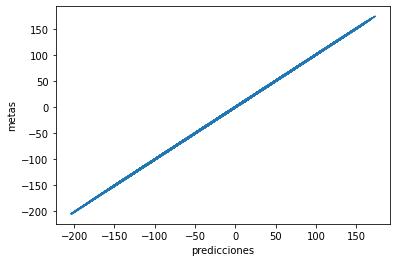

In [96]:
plt.plot(np.squeeze(modelo.predict_on_batch(datos['entradas'])), 
         np.squeeze(datos['targets']))
plt.xlabel('predicciones')
plt.ylabel('metas')
plt.show()

In [97]:
fig = px.scatter(x = np.squeeze(modelo.predict_on_batch(datos['entradas'])), 
                 y =  np.squeeze(datos['targets']))

fig.update_layout(
    title="Comparación predicciones vrs metas",
    xaxis_title="Predicciones",
    yaxis_title="Metas",
    width = 600,
    height = 400,)

fig.show()

### 1) Cambie el número de observaciones a 100,000. Explique que es lo que ocurre en términos de:
1. El tiempo de ejecución para resolver el problemas

<font color='blue'>
R// El tiempo de ejecucion paso de 0.0 a 0.3, basicamente esto se debe a que al aumentar las observaciones  son mas casos a evaluar y por lo tanto mayor el tiempo que toma.
</font>

2. El resultado final vrs lo encontrado en clase: es igual, o diferente...¿porqué?

<font color='blue'>
R// Los resultados pueden ser similares, pero tiene todo el sentdio que no sean exactamente iguales debido a que hay factores importantes que han cambiado como lo puede ser los pesos y por lo tanto sus sesgos.
</font>

3. Las graficas para representar los datos/resultados

<font color='blue'>
R// A mas observaciones las graficas tienen mas datos con los que trabajar lo que se plasma a su vez en poder hacer graficas mas precisas. Pero sin embargo el resultado es similar.
</font>

### 2) Cambie el número de observaciones a 1,000,000. Explique que es lo que ocurre en términos
de:
1. El tiempo de ejecución para resolver el problemas

<font color='blue'>
R// Al igual que en el caso anterior, el tiempo paso de ser 0.0 a 2.0, esto clarametne repercutiria directamente en el tiempo de ejecuccion y significativamente, debido a que se han disparado el numero de observaciones de 100,000 a 1,000,000
</font>

2. El resultado final vrs lo encontrado en clase: es igual, o diferente...¿porqué?

<font color='blue'>
R// Los resultados pueden ser similares, pero tiene todo el sentdio que no sean exactamente iguales 
debido a que hay factores importantes que han cambiado como lo puede ser los pesos y por lo tanto sus sesgos.
</font>

3. Las graficas para representar los datos/resultados

<font color='blue'>
R// Las graficas dieron errores los cuales desconozco y no logran rederizarse apesar de que no dan un error.
</font>

### 3) “Juegue” un poco con el valor de la tasa de aprendizaje, por ejemplo 0.0001, 0.001, 0.1, 1. Para cada uno de estos indique:
1. ¿Qué ocurre con el tiempo de ejecución?

<font color='blue'>
R// 

Tasa de aprendizaje 0.0001, haciendo esto hacemos que el algoritmo aprenda a pasos mas chiquitos resultando que necesite mas y mas interaciones para aprender, por lo que resulta en necesitar mas tiempo pare conseguir las cosas.

Tasa de aprendizaje 1, esto hace que el aprendizaje requiera muchas menos interaciones, pero esto 
causa que despues de todo, el aprendizaje no logre conseguir resultados optimos ya que no tuvo las suficientes iteraciones para aprender adecuadamente.
</font>

2. ¿Qué ocurre con la minimización de la pérdida?

<font color='blue'>
R// A una tasa de aprendizaje baja, la perdidada deciende lentamente, mientras que si la tasa es alta, la perdida tiene un comportamiento contrario, aumenta en lugar de disminuir.
</font>

3. ¿Qué ocurre con los pesos y los sesgos?

<font color='blue'>
R// 

Tasa de aprendizaje baja: Causa que los pesos y sesgos cambien a un ritmo lento

Tasa de aprendizaje alta:  Tanto los pesos como los sesgos cambain de forma muy rapida. 
</font>

4. ¿Qué ocurre con las iteraciones?

<font color='blue'>
R//l

Tasa de aprendizaje baja: Mayor cantidad de iteraciones para conseguir un resultado convergente.


Tasa de aprendizaje alta: Menos iteraciones para conseguir converger. 
</font>

5. ¿El problema queda resuelto o no?


<font color='blue'>
R// Podemos decir que el problema queda resulto, pero tenemos que tomar en cuenta los siguientes factores, es que despues de ver la diferencia entre una tasa baja y una tasa alta es que una tasa alta tendra un resultado bueno aunque se tome mas tiempo, aunque puede derivar en un modelo no muy bien entrenado, mientras que una tasa mayor, da un resultado mas rapido pero con la desventaja que esta puede tener un entrenamiento malo derivando en errores por problemas como los de diverger, por lo que lo recomendable es buscar un valor medio.
</font>

6. ¿Cuál es la apariencia de la última gráfica? ¿Se cumple con la condición de que sea de 45 grados?

<font color='blue'>
R// No se entrena de manera correcta debido a que las graficas quedan con resultados incoherentes, sobre todo la segunda grafica, que tiene un una linea recta en el eje x.
</font>

### 4) Cambie la función de pérdida “L2-norm” a la misma pero sin dividir por 2. Explique lo que ocurre en términos de:
1. El tiempo que se tarda el algoritmo en terminar, comparado a lo que vimos en clase

<font color='blue'>
R//El tiempo no se ve afectado, el peso computacional no es grande, por lo que simplemente la diferencia en infima.
</font>

2. Si la pérdida se minimiza igual que lo que vimos en clase

<font color='blue'>
R// Todo es igual a lo que se vio en clase, excepto un factor el cual creo que es normal que cambie el cual es la funcion de perdidad y la direccion del gradiente.
</font>

3. Si los pesos y sesgos son parecidos a los vistos en clase

<font color='blue'>
R// Al eliminar la division entre 2, no afecta en gran medid, y esto lo vemos en los pesos y los sesgos que son muy similares.
</font>

4. Si el problema se resuelve como ocurrió en clase

<font color='blue'>
R// Sigue resolviendo de forma positiva.
</font>

5. Si se obtiene un mejor resultado al hacer más iteraciones

<font color='blue'>
R// Mas iteraciones no implica intricicamente una mejor respuesta. Esto debido a que existe la posibilidad que sobre ajustemos nuestro modelo lo que ocaciona que nuestro modelo ya no de una respuesta correcta.
</font>

### 5) Cambie la función de pérdida de la “L2-norm” a la “L1-norm”. Explique lo que ocurre
en términos de:
1. El tiempo que se tarda el algoritmo en terminar, comparado a lo que vimos en clase

<font color='blue'>
R// Si toma mas tiempo esto se debe a que para llegar a un resultado, la norma L1 necesita mas tiempo sobre todo en los casos donde hay mas ruido, por la sencibilidad que tiene esta a valores atipicos.
</font>

2. Si la pérdida se minimiza igual que lo que vimos en clase

<font color='blue'>
R//La perdida se ve minimizada.
</font>

3. Si los pesos y sesgos son parecidos a los vistos en clase

<font color='blue'>
R//Los pesos y sesgos no se ven mayormente afectados.
</font>

4. Si el problema se resuelve como ocurrió en clase

<font color='blue'>
R//El problema aun se resuelve.
</font>

5. Si se obtiene un mejor resultado al hacer más iteraciones

<font color='blue'>
R// Un mayor numero de iteraciones no garantiza un mejor resultado y como antes se explico esto se debe a que se puede llevar el modelo a un sobre ajuste del modelo.
</font>

6. ¿Tendrá una de estas más limitaciones que la otra?

<font color='blue'>
R// Cada uno tendra mas o menos limitaciones segun el tipo de problema al que se este afrontando, pero en este caso la norma L1 funciona mejor.
</font>

### 6) Cree una función f(x1,x2) = 13 * x1 + 7 * x2 - 12.


1. ¿Funciona el algoritmo de la misma forma?

<font color='blue'>
R// Si funciona de la misma forma y los resultados no se ven mayormente afectados por este cambio. 
</font>